# Advent of Code
Charel Felten

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

## 1. Advent

In [49]:
df = pd.read_csv("inputs/1", header=None)

f = lambda w: (df.rolling(w).sum().dropna().diff().fillna(0) > 0).sum().loc[0]

print(f"Task 1: {f(1)}, Task 2: {f(3)}")

Task 1: 1266, Task 2: 1217


## 2. Advent

In [50]:
df = pd.read_csv("inputs/2", header=None, sep=" ", names=["direction", "distance"])

t1 = df.groupby("direction").sum().apply(lambda col: (col["down"] - col["up"]) * col["forward"]).loc["distance"]

h, d, a = 0,0,0
for _, (dir, dis) in df.iterrows():
    if dir == "down": a += dis
    if dir == "up": a -= dis
    if dir == "forward":
        h += dis
        d += a*dis
        
print(f"Task 1: {t1}, Task 2: {h * d}")

Task 1: 1882980, Task 2: 1971232560


In [51]:
def f(hda, dirdis):
    h, d, a = hda
    _, (dir, dis) = dirdis
    if dir == "down": a += dis
    if dir == "up": a -= dis
    if dir == "forward":
        h += dis
        d += a*dis
    return (h,d,a)

h, d, a = reduce(f, df.iterrows(), (0,0,0))

print(f"Task 2 Alt: {h * d}")

Task 2 Alt: 1971232560


## 3. Advent

In [52]:
df = pd.read_csv("inputs/3", header=None, sep=" ", dtype="str")

t1 = df\
    .apply(lambda r: list(r.iloc[0]), result_type="expand", axis=1)\
    .agg(["median", lambda c: int(not(c.median()))])\
    .apply(lambda c: 2**((len(df.iloc[0,0])-1)-c.name) * c)\
    .sum(axis=1).prod().astype(int)

t2 = df.apply(lambda r: list(r.iloc[0]), result_type="expand", axis=1).astype(int)

def x(t2, b):
    for c in t2: t2 = t2[t2[c] == t2.groupby(c).size().sort_index(ascending=b).sort_values(ascending=b).index[0]]
    return t2.apply(lambda c: 2**((len(df.iloc[0,0])-1)-c.name) * c).sum(axis=1).iloc[0]

t2 = x(t2, False) * x(t2, True)

print(f"Task 1: {t1}, Task 2: {t2}")

Task 1: 4147524, Task 2: 3570354


## 4. Advent

In [53]:
inputs = pd.read_csv("inputs/4", header=None, nrows=1, engine="python").to_numpy().reshape(-1)
boards = pd.read_csv("inputs/4", header=None, skiprows=[0], sep=r" +", engine="python").to_numpy().reshape(-1, 5, 5)
bingos = np.zeros_like(boards, dtype=bool)

aw = {}
for inp in inputs:
    for match in np.argwhere(boards == inp):
        bingos[tuple(match)] = True
    
    hs = np.argwhere(bingos.sum(axis=1) == boards.shape[1])
    vs = np.argwhere(bingos.sum(axis=2) == boards.shape[1])
    
    nw = set(list(vs[:,0]) + list(hs[:,0]))

    if len(nw) == 1 and len(aw) == 0:
        w = (nw - aw).pop()
        t1 = inp * boards[w, ~bingos[w]].sum()

    if len(nw) == boards.shape[0]:
        l = (nw - aw).pop()
        t2 = inp * boards[l, ~bingos[l]].sum()
        break

    aw = nw

print(f"Task 1: {t1}, Task 2: {t2}")

Task 1: 34506, Task 2: 7686


## 5. Advent

In [54]:
df = pd.read_csv("inputs/5", header=None, sep=r",| -> ", names=["x1", "y1", "x2", "y2"], engine="python")

M = np.zeros(shape=[2] + [df.max().max() + 1] * 2)

for _, (x1,y1,x2,y2) in df.iterrows():
    sx = 1 if x2-x1 > 0 else -1
    sy = 1 if y2-y1 > 0 else -1
    if x1 == x2 or y1 == y2:
        for x in range(x1, x2 + sx, sx):
            for y in range(y1, y2 + sy, sy):
                M[:,y,x] += 1
    else:
        for x,y in zip(range(x1, x2 + sx, sx), range(y1, y2 + sy, sy)):
            M[1,y,x] += 1

print(f"Task 1: {np.sum(M[0] > 1)}, Task 2: {np.sum(M[1] > 1)}")

Task 1: 8622, Task 2: 22037


In [55]:
from itertools import zip_longest as zipl

df = pd.read_csv("inputs/5", header=None, sep=r",| -> ", names=["x1", "y1", "x2", "y2"], engine="python")

M = np.zeros(shape=[2] + [df.max().max() + 1] * 2)

for _, (x1,y1,x2,y2) in df.iterrows():
    for x,y in zipl(range(x1, x2 + (1 if x2-x1 > 0 else -1), (1 if x2-x1 > 0 else -1)), range(y1, y2 + (1 if y2-y1 > 0 else -1), (1 if y2-y1 > 0 else -1))):
        M[:, y if y is not None else y1, x if x is not None else x1] += (x1 == x2 or y1 == y2, 1)

print(f"Task 1: {np.sum(M[0] > 1)}, Task 2: {np.sum(M[1] > 1)}")

Task 1: 8622, Task 2: 22037


## 6. Advent

In [56]:
s = np.array([list(pd.read_csv("inputs/6", header=None).to_numpy().reshape(-1)).count(i) for i in range(9)])

def f(D, s):
    for _ in range(D):
        s = np.roll(s, -1)
        s[6] += s[8]
    return sum(s)

print(f"Task 1: {f(80, s)}, Task 2: {f(256, s)}")

Task 1: 390923, Task 2: 1749945484935


In [57]:
# Source: https://old.reddit.com/r/adventofcode/comments/r9z49j/2021_day_6_solutions/hnfi3nf/

TM = np.matrix([
    [0,1,0,0,0,0,0,0,0],  # this is a transition matrix, so each row encode the prob of transition
    [0,0,1,0,0,0,0,0,0],  # e.g. this row (row 1) has a 1 at col 2, which indicates that there
    [0,0,0,1,0,0,0,0,0],  # is a 100% chance (probability 1) to move from age 2 (col 2) to age 1 (row 1)
    [0,0,0,0,1,0,0,0,0],  # and a 0% chance for all other transitions.
    [0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,1,0,0],
    [1,0,0,0,0,0,0,1,0],  # Fish being reset move from age 0 (col 0) to age 6 (col 6), but so do also
    [0,0,0,0,0,0,0,0,1],  # fish of age 7 (col 7) who move to age 6 (row 6). So two `1`s in this row.
    [1,0,0,0,0,0,0,0,0],  # New fish born move from age 0 (col 0) moves to age 8 (row 8)
])

print(f"Task 1: {np.sum(np.array(TM ** 80)*s)}, Task 2: {np.sum(np.array(TM ** 256)*s)}")

TMTM = np.matrix([
    [0,0,1,0,0,0,0,0,0],  # doing matrix multiplcation, which is the same as power 2, we get the state
    [0,0,0,1,0,0,0,0,0],  # of the matrix after 2 timesteps. Again we can read the fish ages
    [0,0,0,0,1,0,0,0,0],  # e.g. a fish originally aged 4 years (col 4), has a 100% chance to be
    [0,0,0,0,0,1,0,0,0],  # age 2 (row 2) after 2 iterations, which is indeed true
    [0,0,0,0,0,0,1,0,0],
    [1,0,0,0,0,0,0,1,0],  # there are two fish in this row, meaning that there are now 2 fish that are age 5 (row 5)
    [0,1,0,0,0,0,0,0,1],  # after 2 iterations, with one of them starting at age 0 (col 0) (0 -reset-> 6 -> 5)
    [1,0,0,0,0,0,0,0,0],  # and the other one being of age 7 (col 7) and simply aging normally (7 -> 6 -> 5)
    [0,1,0,0,0,0,0,0,0]
])

assert(np.all(TMTM == TM @ TM))

Task 1: 390923, Task 2: 1749945484935


## 7. Advent

In [58]:
p = pd.read_csv("inputs/7", header=None).to_numpy().reshape(-1)

t1 = int(sum(abs(p - np.median(p))))

trinum = lambda n: n * (n+1) / 2  # computes the n-th triangular number (0-indexing hence n+1)
t2 = int(sum(trinum(abs(p - np.floor(np.mean(p))))))

print(f"Task 1: {t1}, Task 2: {t2}")

Task 1: 345197, Task 2: 96361606


In [59]:
# Note: my t2 above does not work for the example input (if using `np.floor` twice), and when one uses `np.round`
# twice, then it does not work for the real input. t2a below works for both verions, but is less efficient.
# reason it does not work: https://old.reddit.com/r/adventofcode/comments/rars4g/2021_day_7_why_do_these_values_work_spoilers/hnk7n2z/

t2a = int(min([sum(trinum(abs(p - i))) for i in range(min(p), max(p))]))
print(f"Task 2 alt: {t2a}")

Task 2 alt: 96361606


## 8. Advent

In [60]:
df = pd.read_csv("inputs/8", header=None, sep=r"|")

t1 = df.loc[:,1].str.split(" ", expand=True).loc[:,1:].apply(lambda c: c.str.len().isin([2,3,4,7])).sum().sum()

def decoder(row):
    S = [set(x) for x in row[0].split(" ")]
    N = {}

    # first find 1,4,7,8
    N[1] = [n for n in S if len(n) == 2][0]
    N[7] = [n for n in S if len(n) == 3][0]
    N[4] = [n for n in S if len(n) == 4][0]
    N[8] = [n for n in S if len(n) == 7][0]

    # 2,3,5 have length 5
    l235 = [n for n in S if len(n) == 5]

    # 2 U 5 = 8, so 3 is the remaining one
    if l235[0] | l235[1] == N[8]: N[3] = l235[2]  # | = set intersection
    elif l235[0] | l235[2] == N[8]: N[3] = l235[1]
    else: N[3] = l235[0]

    # 3 U 4 = 9
    N[9] = N[3] | N[4]

    # 6,9,0 have length 6. we know 9, so can isolate 6 and 0
    l60 = [n for n in S if (len(n) == 6) and n != N[9]]

    # 6 U 1 = 8
    if l60[0] | N[1] == N[8]: N[6], N[0] = l60[0], l60[1]
    else: N[6], N[0] = l60[1], l60[0]

    # knowing 3 we can isolate 2 and 5
    l25 = [n for n in S if (len(n) == 5) and n != N[3]]

    # 5 U 1 = 9
    if l25[0] | N[1] == N[9]: N[5], N[2] = l25[0], l25[1]
    else: N[5], N[2] = l25[1], l25[0]

    # now we just find which number the second column digits map to by reversing the dic and construct the output
    return int("".join([f"{k}" for s in row[1].split(" ") if s for k,v in N.items() if v == set(s)]))
            
t2 = df.apply(decoder, axis=1).sum()

print(f"Task 1: {t1}, Task 2: {t2}")

Task 1: 397, Task 2: 1027422


## 9. Advent

In [61]:
M = pd.read_csv("inputs/9", header=None, dtype="str")[0].str.split("", expand=True).iloc[:,1:-1].astype(np.float32).to_numpy()

M = np.pad(M, 1, 'constant', constant_values=(M.max()))  # padding with large value to handle edge cases
# a min value is lower than its left, right, up and down neighbours
mins = (M < np.roll(M, 1, axis=0)) & (M < np.roll(M, -1, axis=0)) & (M < np.roll(M, 1, axis=1)) & (M < np.roll(M, -1, axis=1)) 

t1 = int((M[mins] + 1).sum())

E = np.zeros_like(M)

def f(i,j,v):  # recursive function to map each basin represented by the coordinate of its min (i,j) to unique value v, stored in E
    E[i,j] = v
    for ii, jj in zip([i+1,i-1,i,i],[j,j,j+1,j-1]):
        if not(E[ii,jj] == v or M[ii,jj] == 9): f(ii,jj,v)

g = lambda i,j: f(i, j, 10 + (i * M.shape[0]) + j)

for c in np.argwhere(mins): g(*c) # mapping f to each basin

_, counts = np.unique(E[E>9], return_counts=True) # counting unique basins with value above 9 and returning their size
t2 = np.product(np.sort(counts)[-3:])  # taking the product of the sizes of the 3 largest basins

print(f"Task 1: {t1}, Task 2: {t2}")

Task 1: 456, Task 2: 1047744


## 10. Advent

In [62]:
df = pd.read_csv("inputs/10", header=None)

def f(s):
    sn, so = s, ""
    while sn != so:  # iteratively remove matching brackets. this ends when no more pairs left
        so, sn = sn, sn.replace("{}", "").replace("[]", "").replace("()", "").replace("<>", "")
    return sn

def f1(s):
    sn, so = f(s), ""
    while sn != so:  # iteratively remove left brackets. this ends when only right brackets left
        so, sn = sn, sn.replace("{", "").replace("[", "").replace("(", "").replace("<", "") 
    return {")":3, "]":57, "}":1197, ">":25137}[sn[0]] if sn else 0  # return score of first (0) right bracket found else 0

def f2(s):
    if f1(s) > 0: return 0  # we only care about the lines that did not have an ending, but no syntax error
    sr = f(s)[::-1]  # remove all pairs and reverse, now we have the required closing bracket order
    sn = [{"(":1,"[":2,"{":3,"<":4}[c] for c in sr]  # replace each brackets with the points it gives
    return reduce(lambda a, b: (a * 5) + b, sn, 0)  # reduce (like fold in Ocaml) to compute score

t1 = df[0].apply(f1).sum()
t2 = df[0].apply(f2).replace(0, np.nan).median().astype(int)

print(f"Task 1: {t1}, Task 2: {t2}")

Task 1: 319233, Task 2: 1118976874


## 11. Advent

In [63]:
from scipy.ndimage import generic_filter

M = pd.read_csv("inputs/11", sep=r" *", header=None, engine="python").iloc[:,1:-1].astype(int).to_numpy()
F = np.zeros_like(M, dtype=bool)

fc = 0
for i in range(1000):
    if i == 100: t1 = fc
    if F.sum() == 100: break
    M = M + 1  # increase energy
    F = F * False  # reset F
    while True:
        MO = generic_filter(input=M, function=lambda m: (m > 9).sum() - (m[4] > 9), footprint=np.ones((3,3)), mode="constant")
        F += (M > 9)  # count flashes
        M[F] = 0  # reset flashed ones
        M += MO  # increase takes only into account the recent flashes
        if MO.sum() == 0: break  # if no more updates we continue
    fc += F.sum()

print(f"Task 1: {t1}, Task 2: {i}")

Task 1: 1620, Task 2: 371


## 12. Advent

In [64]:
df = pd.read_csv("inputs/12", header=None, sep="-")

START, END = "(", ")"  # replace start and end by non-lowercase strings
df.replace({"start":START, "end":END}, inplace=True)

D = {}  # dictionary to represent graph
for _,(k,v) in df.iterrows():
    if k != END and v!= START: D[k] = D.get(k, []) + [v]
    if k != START and v!= END: D[v] = D.get(v, []) + [k]
D[END] = []  # once at the end, we cant leave

def more_than_1_lower(walk):
    for cave in walk:
        if cave.islower() and walk.count(cave) > 1: return True
    return False

def f(condition):
    counter = 0
    walks = [[START]]
    for walk in walks:
        last = walk[-1]
        if last == END: counter += 1
        else:
            for next in D[last]:
                if next.islower() and (next in walk) and condition(walk): continue
                walks.append(walk + [next])
    return counter

print(f"Task 1: {f(lambda x: True)}, Task 2: {f(more_than_1_lower)}")

Task 1: 5457, Task 2: 128506


## 13. Advent

In [65]:
df = pd.read_csv("inputs/13", header=None)
coords = df.loc[~df.loc[:, 0].str.contains("fold")].astype(int).to_numpy()
folds = df[df.loc[:, 0].str.contains("fold")][0].str[11:].str.split("=", expand=True).replace({"x":1, "y":0}).astype(int).to_numpy()
M = np.zeros(coords.max(axis=0)[::-1]+1, dtype=bool)

for x,y in coords: M[y,x] = True

for i, (axis, fold) in enumerate(folds):
    M1, _, M2 = np.split(M, (fold, fold+1), axis)
    M2 = np.flip(M2, axis)
    M = M1 + M2
    if i == 0: t1 = np.sum(M)

print(f"Task 1: {t1}, Task 2:\n" + "\n".join(["".join(["░░" if i else "  " for i in row]) for row in M]))

Task 1: 716, Task 2:
░░░░░░    ░░░░░░      ░░░░    ░░    ░░  ░░░░░░░░  ░░░░░░    ░░        ░░░░░░    
░░    ░░  ░░    ░░  ░░    ░░  ░░  ░░    ░░        ░░    ░░  ░░        ░░    ░░  
░░    ░░  ░░    ░░  ░░        ░░░░      ░░░░░░    ░░░░░░    ░░        ░░    ░░  
░░░░░░    ░░░░░░    ░░        ░░  ░░    ░░        ░░    ░░  ░░        ░░░░░░    
░░  ░░    ░░        ░░    ░░  ░░  ░░    ░░        ░░    ░░  ░░        ░░  ░░    
░░    ░░  ░░          ░░░░    ░░    ░░  ░░        ░░░░░░    ░░░░░░░░  ░░    ░░  


## 14. Advent

In [66]:
from itertools import product
from copy import copy

series = pd.read_csv("inputs/14", header=0, sep=" -> ", engine='python', index_col=0, squeeze=True)

units = set(series.unique())
pairs = set("".join(pair) for pair in product(units, repeat=2))
transitions = {pa+ir:(pa+new, new+ir) for (pa, ir), new in series.iteritems()}

def f(iterations):
    paircount = {pair:series.name.count(pair) for pair in pairs}  # the series.name is the input string
    unitcount = {unit:0 for unit in units}
    
    for _ in range(iterations):
        for pair, count in copy(paircount).items():
            rightpair, leftpair   = transitions[pair]
            paircount[rightpair] += count
            paircount[leftpair]  += count
            paircount[pair]      -= count

    for (pa, ir), count in paircount.items():
        unitcount[pa] += count
        unitcount[ir] += count

    unitdf = np.ceil( pd.DataFrame.from_dict(unitcount, orient="index") / 2).astype(int)
    return int(unitdf.max() - unitdf.min())

print(f"Task 1: {f(10)}, Task 2: {f(40)}")

Task 1: 2703, Task 2: 2984946368465


## 15. Advent

[[3 7 2 ... 8 5 3]
 [5 8 3 ... 7 9 6]
 [4 1 3 ... 9 8 3]
 ...
 [7 6 7 ... 8 8 9]
 [4 7 4 ... 9 4 8]
 [5 4 1 ... 3 6 6]]


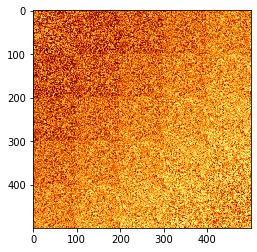

[[   0    7    9 ... 1734 1739 1742]
 [   5   13   12 ... 1732 1741 1746]
 [   9   10   13 ... 1741 1741 1740]
 ...
 [1768 1766 1760 ... 2809 2809 2818]
 [1772 1771 1764 ... 2815 2813 2821]
 [1774 1769 1765 ... 2818 2819 2825]]


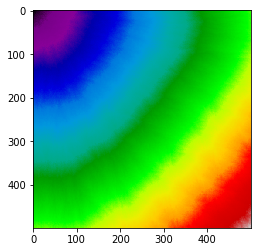

In [229]:
import heapq

H = []
M = pd.read_csv("inputs/15", sep=r" *", engine="python", header=None).iloc[:,1:-1].to_numpy()
M = np.vstack([np.hstack([ (((M+i+j-1) % (10-1)) + 1) for i in range(5)]) for j in range(5)])
inf = M.sum()
D = np.ones_like(M) * inf  # high value
heapq.heappush(H, (0, (0,0)))

while H:
    value, current = heapq.heappop(H)
    i,j = current
    if D[current] < inf: continue  # dont revisit node again
    D[current] = value
    neighbours = {(min(i+1, M.shape[0]-1), j), (max(i-1, 0), j), (i, min(j+1, M.shape[1]-1)), (i, max(j-1, 0))}
    for neighbour in neighbours:
        if D[neighbour] > D[current] + M[neighbour]:
            heapq.heappush(H, (D[current] + M[neighbour], neighbour))
        
print(M)
plt.imshow(M, cmap="afmhot")
plt.show()
plt.imshow(D, cmap="nipy_spectral", interpolation="None")
print(D)